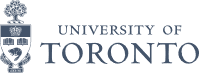

# Session 5: LLMs an *introduction*.


# Introdution to LLMs

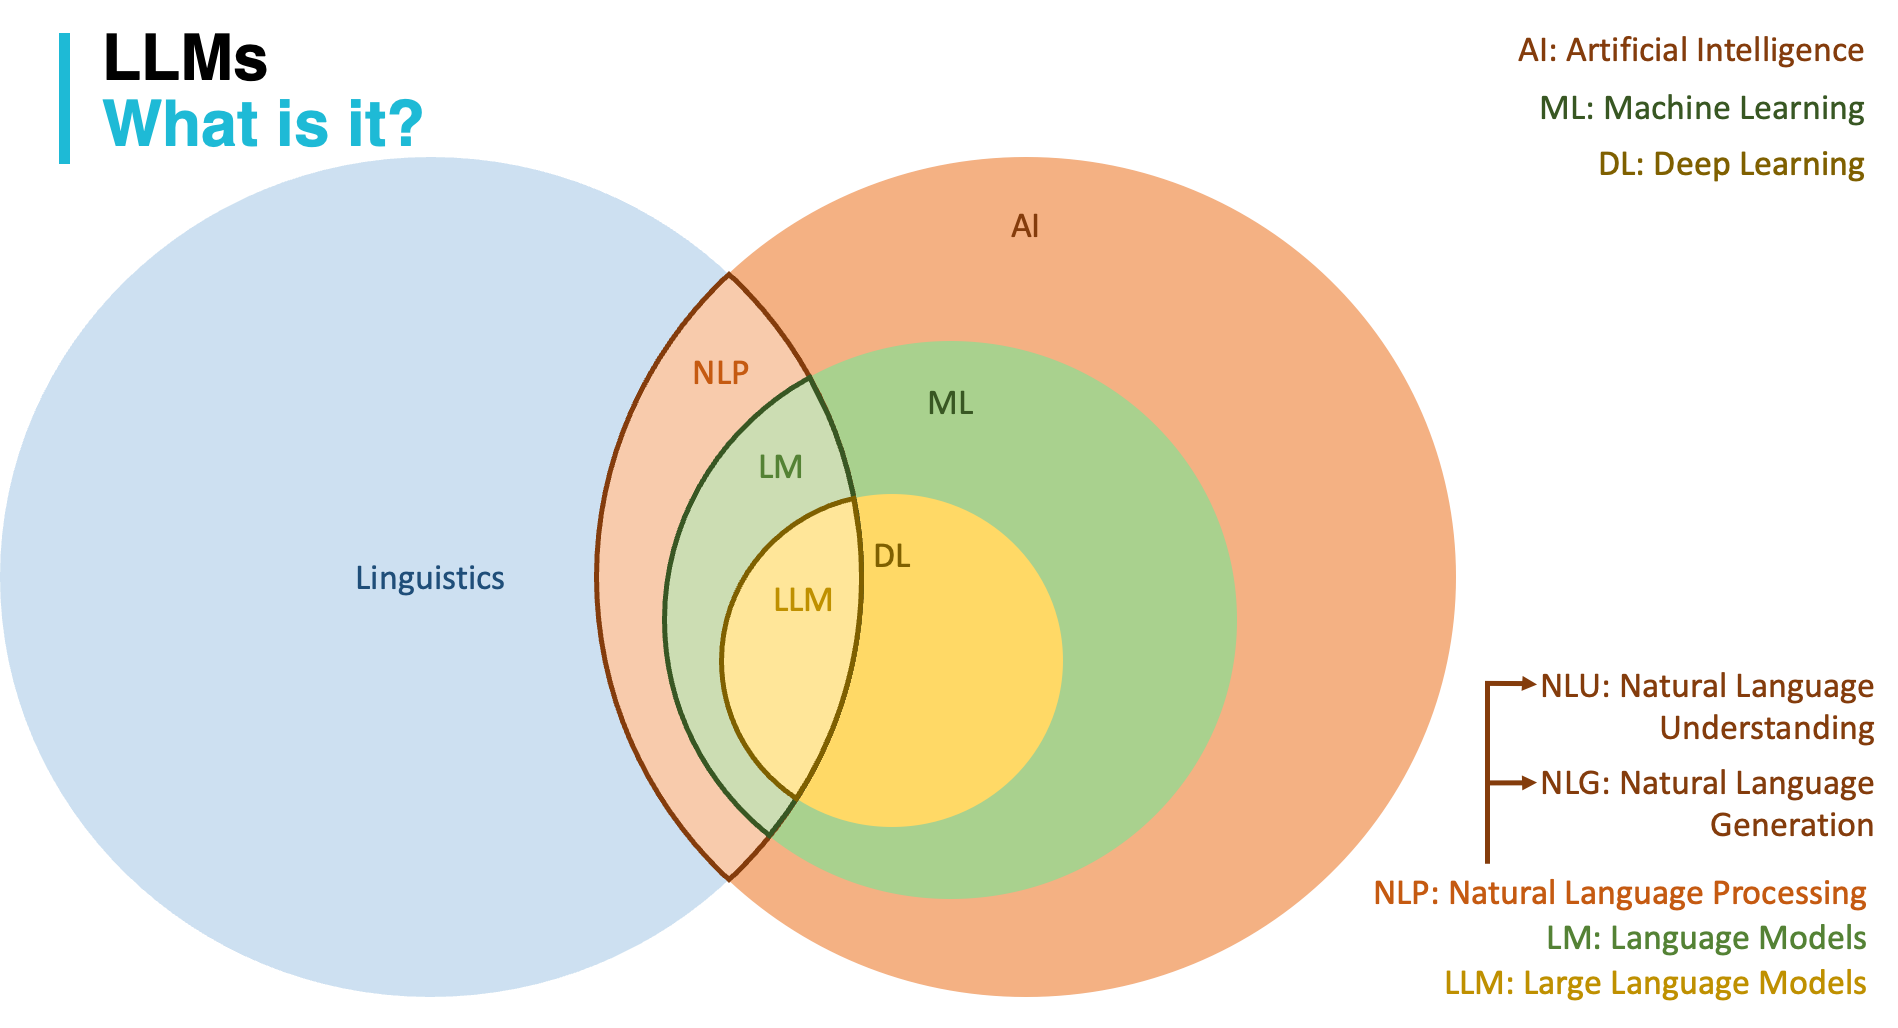

Video:

1. Large Language Model:

- LLM: Large Language Model, foundation model

- LLM = Data + Architecture + Training

- Applications: Communication, Video, Software Engineering

2. AI Buzzwords Bingo:

- Artificial Intelligence \\
↓ \\
- Machine Learning: Supervised learning, unsupervised learning, re-enforcement learning \\
↓ \\
- Deep Learning: \\
↓ \\
- Foundation Models: large language model, generative AI

A large language model (*LLM*) is a computational model **capable of language generation or other natural language processing tasks**. As language models, LLMs acquire these abilities by learning statistical relationships from vast amounts of text during a **self-supervised and semi-supervised training** process.[1]

The **largest and most capable LLMs**, as of August 2024, are artificial **neural networks built with a decoder-only** **transformer-based architecture**, which enables efficient processing and generation of large-scale text data. Modern models can be fine-tuned for specific tasks or can be guided by prompt engineering.[2] These models acquire knowledge about syntax, semantics, and ontologies[3] inherent in human language corpora, but they also inherit inaccuracies and biases present in the data they are trained on.[4]





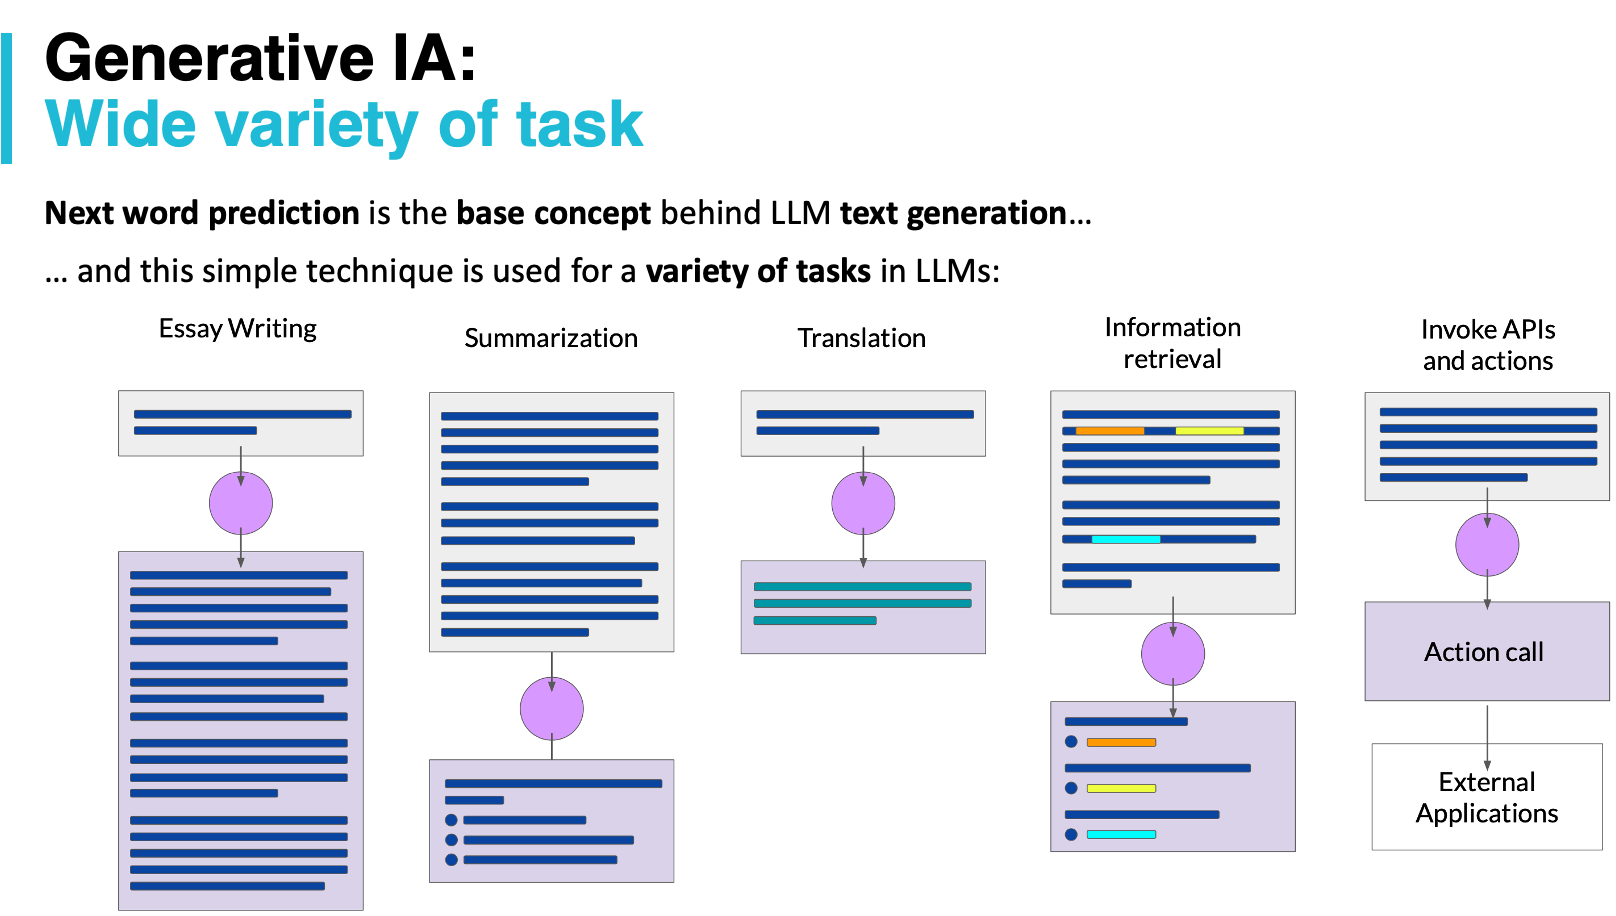

Some notable LLMs are OpenAI's GPT series of models (e.g., GPT-3.5, GPT-4 and GPT-4o; used in ChatGPT and Microsoft Copilot), Google's Gemini (the latter of which is currently used in the chatbot of the same name), Meta's LLaMA family of models, IBM's Granite models initially released with Watsonx, Anthropic's Claude models, and Mistral AI's models.

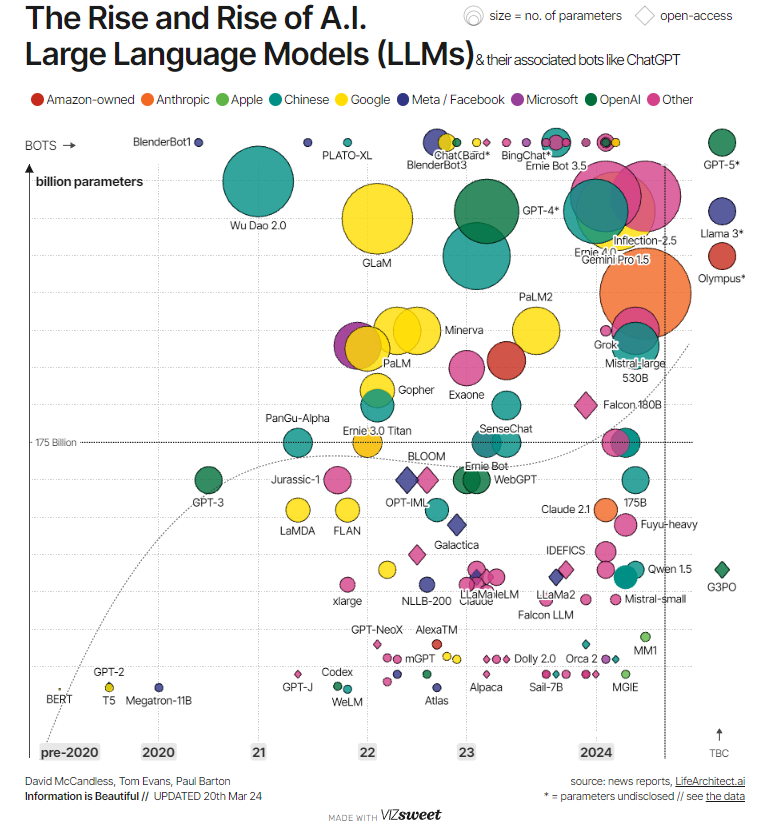

* **Source**: https://informationisbeautiful.net/visualizations/the-rise-of-generative-ai-large-language-models-llms-like-chatgpt/

* **Data Source**: https://docs.google.com/spreadsheets/d/1O5KVQW1Hx5ZAkcg8AIRjbQLQzx2wVaLl0SqUu-ir9Fs/edit?gid=1074218710#gid=1074218710


**Tokenization**

Because **machine learning algorithms process numbers rather than text**, the text must be converted to numbers. In the first step, a vocabulary is decided upon, then integer indices are arbitrarily but uniquely assigned to each vocabulary entry, and finally, an embedding is associated to the integer index. Algorithms include byte-pair encoding (BPE) and WordPiece. There are also special tokens serving as control characters, such as [MASK] for masked-out token (as used in BERT), and [UNK] ("unknown") for characters not appearing in the vocabulary.

For example, the BPE tokenizer used by GPT-3 (Legacy) would split tokenizer: texts -> series of numerical "tokens" as

token	izer	:	 texts	 ->	series	 of	 numerical	 "	t	ok	ens	"
Tokenization also compresses the datasets. Because LLMs generally require input to be an array that is not jagged, the shorter texts must be "padded" until they match the length of the longest one. How many tokens are, on average, needed per word depends on the language of the dataset.[5][6]

 1. "Better Language Models and Their Implications". OpenAI. 2019-02-14. Archived from the original on 2020-12-19. Retrieved 2019-08-25.
 2. Brown, Tom B.; Mann, Benjamin; Ryder, Nick; Subbiah, Melanie; Kaplan, Jared; Dhariwal, Prafulla; Neelakantan, Arvind; Shyam, Pranav; Sastry, Girish; Askell, Amanda; Agarwal, Sandhini; Herbert-Voss, Ariel; Krueger, Gretchen; Henighan, Tom; Child, Rewon; Ramesh, Aditya; Ziegler, Daniel M.; Wu, Jeffrey; Winter, Clemens; Hesse, Christopher; Chen, Mark; Sigler, Eric; Litwin, Mateusz; Gray, Scott; Chess, Benjamin; Clark, Jack; Berner, Christopher; McCandlish, Sam; Radford, Alec; Sutskever, Ilya; Amodei, Dario (Dec 2020). Larochelle, H.; Ranzato, M.; Hadsell, R.; Balcan, M.F.; Lin, H. (eds.). "Language Models are Few-Shot Learners" (PDF). Advances in Neural Information Processing Systems. 33. Curran Associates, Inc.: 1877–1901.
 3.  Fathallah, Nadeen; Das, Arunav; De Giorgis, Stefano; Poltronieri, Andrea; Haase, Peter; Kovriguina, Liubov (2024-05-26). NeOn-GPT: A Large Language Model-Powered Pipeline for Ontology Learning (PDF). Extended Semantic Web Conference 2024. Hersonissos, Greece.
 4. Manning, Christopher D. (2022). "Human Language Understanding & Reasoning". Daedalus. 151 (2): 127–138. doi:10.1162/daed_a_01905. S2CID 248377870.
 5. Yennie Jun (2023-05-03). "All languages are NOT created (tokenized) equal". Language models cost much more in some languages than others. Archived from the original on 2023-08-17. Retrieved 2023-08-17. In other words, to express the same sentiment, some languages require up to 10 times more tokens.
 6. Petrov, Aleksandar; Malfa, Emanuele La; Torr, Philip; Bibi, Adel (June 23, 2023). "Language Model Tokenizers Introduce Unfairness Between Languages". NeurIPS. arXiv:2305.15425 – via openreview.net.

[Source] - Wikipedia https://en.wikipedia.org/wiki/Large_language_model

# Install all needed elements

Now lets see an example of working with an LLM

In [1]:
#@title <font color='blue'> Install all external packages (1-2 minutes)
!pip install datasets --quiet
!pip install accelerate --quiet
!pip install bitsandbytes --quiet
!pip install peft --quiet
!pip install evaluate --quiet
!pip install trl --quiet
!pip install rouge_score --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.1 MB/s

In [2]:
#@title <font color='blue'> import packages to be used in this lab and (<1 minute)
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, TrainingArguments, pipeline
from datasets import Dataset
from peft import LoraConfig, TaskType, get_peft_model
from huggingface_hub import notebook_login
import evaluate
from trl import SFTTrainer
import requests
import json

In [3]:
#@title <font color='blue'>Check if CUDA (GPU) is available
if torch.cuda.is_available():
    # Get the number of available CUDA devices
    num_devices = torch.cuda.device_count()
    print("Number of available CUDA devices:", num_devices)

    # Iterate over CUDA devices and print their indices and names
    for i in range(num_devices):
        print("GPU index", i, ":", torch.cuda.get_device_name(i))
else:
    print("CUDA is not available. CPU will be used.")

Number of available CUDA devices: 1
GPU index 0 : Tesla T4



# The Llama 2 Model



**Llama 2** is a collection of **pretrained and fine-tuned generative text models ranging in scale from 7 billion to 70 billion parameters**. This is the repository for the 7B fine-tuned model, optimized for dialogue use cases and converted for the Hugging Face Transformers format. Links to other models can be found in the index at the bottom.

**Model Details**

*Note*: Use of this model is governed by the **Meta license**. In order to download the model weights and tokenizer, please visit the website and accept our License before requesting access here.

Meta developed and publicly released the Llama 2 family of large language models (LLMs), a collection of pretrained and fine-tuned generative text models ranging in scale from 7 billion to 70 billion parameters. Our fine-tuned LLMs, called Llama-2-Chat, are optimized for dialogue use cases. Llama-2-Chat models outperform open-source chat models on most benchmarks we tested, and in our human evaluations for helpfulness and safety, are on par with some popular closed-source models like ChatGPT and PaLM.

**Model Developers** Meta

**Variations** Llama 2 comes in a range of parameter **sizes** — 7B, 13B, and 70B — as well as pretrained and fine-tuned variations.

- Input Models input text only.

- Output Models generate text only.

**Model Architecture** Llama 2 is an auto-regressive language model that uses an optimized transformer architecture. The tuned versions use supervised fine-tuning (SFT) and reinforcement learning with human feedback (RLHF) to align to human preferences for helpfulness and safety.

**Llama 2 family of models**. Token counts refer to pretraining data only. All models are trained with a global **batch-size of 4M tokens**. Bigger models - 70B -- use Grouped-Query Attention (GQA) for improved inference scalability.

**Model Dates** Llama 2 was trained between January 2023 and **July 2023**.

**Status** This is a static model trained on an offline dataset. Future versions of the tuned models will be released as we improve model safety with community feedback.



License A custom commercial license is available at: https://ai.meta.com/resources/models-and-libraries/llama-downloads/

## Setting and Importing Llama 2

## **Tokenizer**: load and config

This section of code deals with preparing the tokenizer for the Llama 2 model. Here's a breakdown:

**1. Loading the Tokenizer:**

This line loads the pre-trained tokenizer associated with the Llama-2-7b-chat-hf model from the Hugging Face model hub. Tokenizers are responsible for converting text into numerical representations (tokens) that the model can understand.

`tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-chat-hf") # Load tokenizer`

In [4]:
tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-chat-hf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

**2. Setting Padding Token**:

This line **sets the padding token of the tokenizer to be the same as the end-of-sequence (EOS) token**. Padding is used to ensure that all input sequences have the same length, which is often required by deep learning models.

`tokenizer.pad_token = tokenizer.eos_token #  Padding token of the tokenizer to be the same as the end-of-sequence (eos) token`


In [5]:
tokenizer.pad_token = tokenizer.eos_token

**3. Setting Padding Side:**

In essence, this code **prepares the tokenizer to handle text data in a way that is compatible with the Llama 2 model**, ensuring that input sequences are properly tokenized and padded for efficient processing.

`tokenizer.adding_side = "right" # Padding should be added to the right side of the input sequences`




In [6]:
tokenizer.adding_side = "right"

In [7]:
#@title Import Llama 2 in a block (if done previously don't run)

#tokenizer = AutoTokenizer.from_pretrained("NousResearch/Llama-2-7b-chat-hf") # Load tokenizer
#tokenizer.pad_token = tokenizer.eos_token #  Padding token of the tokenizer to be the same as the end-of-sequence (eos) token
#tokenizer.padding_side = "right" # Padding should be added to the right side of the input sequences

## **Quantization:** set the configuration

This section of your code sets up the base model for your project and configures quantization to optimize its efficiency.

**Base Model**

You're using the [NousResearch's Llama-2-7b-chat-hf model](https://huggingface.co/NousResearch/Llama-2-7b-chat-hf) as your base. This is a 7 billion parameter large language model fine-tuned for chat interactions. The comments indicate you chose this version because it's readily available on the Hugging Face model hub.

**Quantization**

[Quantization](https://huggingface.co/docs/transformers/main_classes/quantization) is a technique used to reduce the memory and computational requirements of a model. It works by representing the model's weights and activations with lower-precision data types (e.g., 4-bit instead of 32-bit).

**Code Breakdown**

The commented-out code you provided would define the quantization configuration:





* **Load_in_4bit=True**: This enables 4-bit quantization for the model's weights.
* **bnb_4bit_compute_dtype=torch.float16**: Specifies that computations will be performed using 16-bit floating-point precision after the weights are loaded in 4-bit format.
* **bnb_4bit_quant_type="nf4"**: Sets the specific quantization data type to NF4 (NormalFloat4).



**Key Points**

* **Quantization** can significantly **improve the efficiency** of large language models, making them more practical to deploy and use.
* There are **trade-offs** to consider with quantization, as it can sometimes slightly impact the model's performance.
* The specific quantization configuration you choose will **depend** on factors like the **model architecture**, the **hardware** you're using, and the desired **balance between performance and efficiency**.


In [8]:
##Create quantization configuration

# Base model
# We will use NousResearch's Llama-2-7b-chat-hf as a base model, which is the same as the original, but easily accessible.
# Model: https://huggingface.co/NousResearch/Llama-2-7b-chat-hf

# Create quantization config
# https://huggingface.co/docs/transformers/main_classes/quantization
# Quantization techniques reduce memory and computational costs
# by representing weights and activations with lower-precision data types
quantization_config = BitsAndBytesConfig(
    Load_in_4bit=True, # This flag is used to enable 4-bit quantization
    bnb_4bit_compute_dtype=torch.float16, # This sets the computational type: once the weights are loaded in 4-bit, the computations will be performed using 16-bit floating-point precision.
    bnb_4bit_quant_type="nf4" # This sets the quantization data type
)

Unused kwargs: ['Load_in_4bit']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


## **Download:** Llama 2 Model according to previous configuration

Here we download the model using the quantization configuration for processing

The following code snippet downloads and sets up the Llama 2 model, applying the quantization configuration we defined earlier and specifying where to load the model (device placement).

**Breakdown**


`model = AutoModelForCausalLM.from_pretrained(
    "NousResearch/Llama-2-7b-chat-hf",  # Load model
    quantization_config=quantization_config,  # Quantization configuration
    device_map=0  # Device placement
)`


* **`AutoModelForCausalLM.from_pretrained()`**: This function from the Hugging Face Transformers library downloads and initializes a pre-trained causal language model. Causal language models are designed for tasks like text generation where the model predicts the next token based on the previous ones.

* **"`NousResearch/Llama-2-7b-chat-hf`"**: This specifies the name of the pre-trained model you want to load from the Hugging Face model hub.

* **`quantization_config=quantization_config`**: This applies the quantization configuration you defined earlier (quantization_config) to the model. This step optimizes the model for efficiency by reducing its memory and computational requirements.

* **`device_map=0`**: This tells the library to load the entire model onto the first available GPU (device with index 0). If you have multiple GPUs, you can adjust this value to distribute the model across them. If you don't have a GPU, it will default to using your CPU.

**Key Points**

This code combines the pre-trained model with your quantization settings to create an efficient and ready-to-use language model for your tasks.
Device placement is crucial for leveraging the power of GPUs, especially for large language models that can be computationally demanding.

In [9]:
# Here we download the model using the quantization configuration for processing
model = AutoModelForCausalLM.from_pretrained("NousResearch/Llama-2-7b-chat-hf", # Load model
                                             quantization_config= quantization_config, # Quantification configuration
                                             device_map="auto" # device_map = 0 means put the whole model on GPU 0; device_map="auto" compute the most optimized `device_map` automatically
)

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

Let's now show what we have just downladed, using the `print` command....

In [10]:
print(model)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(32000, 4096, padding_idx=0)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear4bit(in_features=11008, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNor

# Running Llama 2.

## Zero-shot

**Zero-shot learning** in the context of LLMs (Large Language Models) refers to the ability of a model to perform a task without having seen any examples of that task during training.

**How it Works**

Instead of explicitly training the model on a specific task, **you provide it with a natural language prompt that describes the task and the desired output format**. The LLM leverages its vast knowledge and understanding of language to interpret the prompt and generate a response, even though it has never been explicitly trained on that particular task.

**Example**

**No example of the task is provided**. Let's say you have an LLM and want it to translate English to French. In zero-shot learning, you wouldn't provide the model with any English-French translation pairs during training. Instead, at inference time, you would give it a prompt like:


`Translate the following English sentence to French: "Hello, how are you?"`


The LLM, based on its general language understanding, would attempt to generate the French translation:


`Bonjour, comment ça va?`


**Advantages**

* **Flexibility**: Zero-shot learning allows LLMs to adapt to new tasks without requiring additional training data.

* **Efficiency**: It eliminates the need for task-specific datasets and training, saving time and resources.

**Limitations**

* **Accuracy**: Zero-shot performance can be less accurate compared to models fine-tuned on specific tasks.


* **Ambiguity**: Complex or ambiguous prompts might lead to incorrect or unexpected outputs.

**Key Takeaway**

Zero-shot learning is a powerful capability of LLMs that allows them to generalize to new tasks without explicit training. While it might not always achieve the same level of accuracy as fine-tuned models, it offers flexibility and efficiency for a wide range of applications.

### An **step-by-step** hands example using Llama 2 Chat.

#### Create a `prompt` ("the question for the LLM)

Let's do it step by step. First take one question




In [11]:
prompt = "What is the code for microsoft in Yahoo finance?"
print(prompt)

What is the code for microsoft in Yahoo finance?


#### Create the command ("`pipeline`")

Now lets create a text generation pipeline using the Hugging Face Transformers library and prints a summary of the pipeline's configuration. To do so, we will create the following command:

```
pipe = pipeline(
    task="text-generation",  # Task type
    model=model,             # Language model
    tokenizer=tokenizer,     # Tokenizer
    max_length=200,          # Maximum output length
    truncation=True          # We use truncation for truncating the results
)


Let's exaplain how it works:


1. **pipeline()**: This function from the Transformers library creates a pipeline object that simplifies the process of using a pre-trained model for a specific task.

2. **task="text-generation"**: This specifies that the pipeline will be used for text generation, where the model generates text based on a given input. Other task that can be applied: *'question-answering', 'summarization', 'transaltion_en_to_sp', 'feature-extraction','token-classification','filling-masked-text'...*
3. **model=model**: This assigns the pre-trained language model you loaded earlier (model) to the pipeline.

4. **tokenizer=tokenizer**: This assigns the tokenizer you loaded earlier (tokenizer) to the pipeline. The tokenizer is responsible for converting text into numerical representations that the model can understand.

5. **max_length=200**: This sets the maximum number of tokens (roughly words or subwords) that the generated text can contain.


**Key Points**

* The `pipeline` object provides a convenient way to use pre-trained models for various NLP tasks without having to write complex code.
* The `max_length` parameter helps control the length of the generated text, preventing it from becoming too verbose.

Let's run the command now:

In [12]:
pipe = pipeline(
    task="text-generation",  # Task type
    model=model,             # Language model
    tokenizer=tokenizer,     # Tokenizer
    max_length=200,          # Maximum output length
    truncation=True          # We use truncation for truncating the results
)

#### Send the command to the LLM.

Now lests create the code snippet that uses the previously created text generation pipeline (pipe) to generate text based on a given prompt and then prints the generated text.

For Llama 2, there is a specic way or sintaxis to communicate. The simple way would be going for a **direct question**. To do so this would be the estructure of the text to be sent to Llama 2.

```
# Direct Without a system message
# <s>[INST] {user_message_1} [/INST] {model_reply_1}</s>

```
If your want additonaly to **instruct the model to bahave in a certain way** you can also use the following instruction

```
# Direct Without a system message
# <s>[INST] <<SYS>> {system_message} <</SYS>>  {user_message_1} [/INST] {model_reply_1}</s>
```


So, if we are about to create a simple and direct question to the LLM, we can create a pipe using the following comamnd.

```
result = pipe(f"<s>[INST] {prompt} [/INST]"</s>)
print(result[0]['generated_text'])

```

1. **`result = pipe(f"<s>'''[INST] {prompt} \n\n [/INST]") </s>`** : This line calls the pipeline (pipe) with the formatted prompt.

* The prompt **$<s>$ serves as a special token indicating the beginning of a sequence**. It helps the model delineate the start of a new input or conversation turn. This token is often used in conjunction with other special tokens like "[INST]" and "[/INST]" to structure the input for the model.
* The prompt is embedded within special tokens: [**INST] indicates the start** of the instruction, and **[/INST] marks the end**.
* This formatting helps guide the language model to understand that it needs to generate a response to the given prompt.

2. **print(result[0]['generated_text'])**: This line prints the generated text from the result.

* The `result` object typically contains a list of generated outputs (even if you only provided one input).
* `result[0]` accesses the first (and likely only) generated output.
* `['generated_text']` extracts the actual text string from the output dictionary.

**Key Points**

* The specific formatting of the prompt with special tokens is often required by language models to correctly interpret and respond to instructions.
* The output of the pipeline is usually a structured object containing various information about the generation process; you need to extract the 'generated_text' field to get the actual text output.

**Special Tockens used in Meta Llama 2**

* `<s></s>:` These are the BOS and EOS tokens from SentencePiece. When multiple messages are present in a multi turn conversation, they separate them, including the user input and model response.
* `[INST][/INST]:` These tokens enclose user messages in multi turn conversations.
* `<<SYS>><</SYS>>:` These enclose the system message.

##### Send a **direct** command **without system indications**

Let's run the command:

In [13]:
result = pipe(f"<s>[INST] {prompt} \n\n [/INST]</s>")

Now print the result.

In [14]:
print(result[0]['generated_text'])

<s>[INST] What is the code for microsoft in Yahoo finance? 

 [/INST]</s>  Microsoft's ticker symbol is MSFT, so the code for Microsoft in Yahoo Finance is:

MSFT

You can use this code to search for information about Microsoft on Yahoo Finance, including its stock price, market data, news, and more.


##### **Including system indications** - full command

Let's try now using also a System Command. A prompt with a system message works including the system imformation between `<<SYS>>` and `<<\SYS>>`. By including a system message, you can guide the model to adopt a specific tone, style, or behavior in its responses.

In [15]:
result_with_sys = pipe(f"<s>[INST] <<SYS>> {'provide just a simple answer with one single word'} <</SYS>> {prompt} \n [/INST] </s> \n")

In [16]:
print(result_with_sys[0]['generated_text'])

<s>[INST] <<SYS>> provide just a simple answer with one single word <</SYS>> What is the code for microsoft in Yahoo finance? 
 [/INST] </s> 
The code for Microsoft in Yahoo Finance is "MSFT".


Lets now, remove all the information, that it is not part of the answer. But first remember all the steps we need:

In [17]:
[i.strip() for i in result_with_sys[0]['generated_text'].split('</s>')][1]

'The code for Microsoft in Yahoo Finance is "MSFT".'

### Using a function to get the response **"llama2_zeroShot"**

Lets create the function with two input parameters. The

In [18]:
def llama2_zeroShot(prompt, max_length=500, system_prompt=None):
  """
  This function provides the output of the llmama2 model

  Args:
    prompt: This will be the text provided to llama2 LLM
    max_length: This will be the maximum length of the output


  Returns:
    result: This will be the output of the llama2 LLM
  """
  # Create a text generation pipeline using the pre-trained Llama 2 model and tokenizer
  pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=max_length, truncation=True)

  # Generate text based on the provided prompt and store the output in 'temp'
  if system_prompt is None:
    temp = pipe(f"<s>[INST] {prompt} \n\n [/INST]</s>")
    #print('No system message!!!')
  else:
    temp = pipe(f"<s>[INST] <<SYS>>{system_prompt}<</SYS>> {prompt} \n [/INST] </s> \n")
    #print('YES. We will work with a system message!!!')

  # Extract the generated response by splitting the output at '[/INST]' and cleaning up the previous text
  result = [i.strip() for i in temp[0]['generated_text'].split('</s>')][1]

  print(result)

  return result

Now let's check if asking a simple question.

In [19]:
prompt = 'Description of the company microsoft'
max_length = 1000
llama2_zeroShot(prompt=prompt, max_length=max_length)

Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond, Washington.

Microsoft is one of the largest and most successful technology companies in the world, with a diverse portfolio of products and services that include:

1. Operating systems: Microsoft produces the Windows operating system, which is used by millions of computers around the world. The company also offers other operating systems, such as Windows Server and Windows Embedded.
2. Office productivity software: Microsoft is the developer of the Microsoft Office suite of productivity software, which includes popular applications such as Word, Excel, PowerPoint, and Outlook.
3. Gaming: Microsoft owns Xbox, a popular gaming brand that includes the Xbox console, Xbox games, and Xbox Live online gaming service.
4. Devices: Microsoft m

'Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond, Washington.\n\nMicrosoft is one of the largest and most successful technology companies in the world, with a diverse portfolio of products and services that include:\n\n1. Operating systems: Microsoft produces the Windows operating system, which is used by millions of computers around the world. The company also offers other operating systems, such as Windows Server and Windows Embedded.\n2. Office productivity software: Microsoft is the developer of the Microsoft Office suite of productivity software, which includes popular applications such as Word, Excel, PowerPoint, and Outlook.\n3. Gaming: Microsoft owns Xbox, a popular gaming brand that includes the Xbox console, Xbox games, and Xbox Live online gaming service.\n4. Devices: Mic

Now with the prompt to the system

In [20]:
prompt = 'Description of the company microsoft'
max_length = 1000
system_prompt = 'you are a 8 years old kid'
llama2_zeroShot(prompt=prompt, max_length=max_length, system_prompt=system_prompt)

Oh wow! Microsoft is like, so cool! *excited squeal* They make all sorts of things, like computers and phones and video games! *bounces up and down* My favorite is Minecraft! *nods* I love building and exploring in that game! *giggles*

But did you know that Microsoft also makes Windows? *nods* That's the operating system on my mom's computer! *looks up* And they have something called Office too! *excitedly* It's like, a whole suite of programs for work and stuff! *bounces up and down* Like Word and Excel and PowerPoint! *nods* My teacher uses PowerPoint to make presentations! *giggles*

And did you know that Microsoft has a gaming console called Xbox? *excitedly* My dad has one and we play games together! *bounces up and down* Like Fortnite and Call of Duty! *nods* It's so much fun! *giggles*

Oh, and Microsoft also has something called Azure! *nods* It's like, a cloud for computers! *excitedly* So you can store your pictures and videos and stuff online! *bounces up and down* And you 

"Oh wow! Microsoft is like, so cool! *excited squeal* They make all sorts of things, like computers and phones and video games! *bounces up and down* My favorite is Minecraft! *nods* I love building and exploring in that game! *giggles*\n\nBut did you know that Microsoft also makes Windows? *nods* That's the operating system on my mom's computer! *looks up* And they have something called Office too! *excitedly* It's like, a whole suite of programs for work and stuff! *bounces up and down* Like Word and Excel and PowerPoint! *nods* My teacher uses PowerPoint to make presentations! *giggles*\n\nAnd did you know that Microsoft has a gaming console called Xbox? *excitedly* My dad has one and we play games together! *bounces up and down* Like Fortnite and Call of Duty! *nods* It's so much fun! *giggles*\n\nOh, and Microsoft also has something called Azure! *nods* It's like, a cloud for computers! *excitedly* So you can store your pictures and videos and stuff online! *bounces up and down* A

Let's see another example:

In [21]:
llama2_zeroShot(prompt='10 largers companies in NASDAQ Composite.', max_length=500)

Here are the 10 largest companies in the NASDAQ Composite index, based on market capitalization:

1. Apple Inc. (AAPL) - $2.34 trillion
2. Microsoft Corporation (MSFT) - $2.14 trillion
3. Amazon.com Inc. (AMZN) - $1.46 trillion
4. Alphabet Inc. (GOOGL) - $1.34 trillion
5. Facebook Inc. (FB) - $827 billion
6. Johnson & Johnson (JNJ) - $772 billion
7. Procter & Gamble Company (PG) - $724 billion
8. Visa Inc. (V) - $674 billion
9. Mastercard Inc. (MA) - $663 billion
10. Intel Corporation (INTC) - $645 billion

Note: Market capitalization is subject to change and may not reflect the current market value of these companies.


'Here are the 10 largest companies in the NASDAQ Composite index, based on market capitalization:\n\n1. Apple Inc. (AAPL) - $2.34 trillion\n2. Microsoft Corporation (MSFT) - $2.14 trillion\n3. Amazon.com Inc. (AMZN) - $1.46 trillion\n4. Alphabet Inc. (GOOGL) - $1.34 trillion\n5. Facebook Inc. (FB) - $827 billion\n6. Johnson & Johnson (JNJ) - $772 billion\n7. Procter & Gamble Company (PG) - $724 billion\n8. Visa Inc. (V) - $674 billion\n9. Mastercard Inc. (MA) - $663 billion\n10. Intel Corporation (INTC) - $645 billion\n\nNote: Market capitalization is subject to change and may not reflect the current market value of these companies.'

## One-Shot

**One-shot** learning in the context of LLMs (Large Language Models) refers to the ability of a model to learn to perform a task after seeing only one example of that task.

**How it Works**

Instead of extensive training on a large dataset of labeled examples, you provide the LLM with a single example that demonstrates both the input and the desired output for the task. The model leverages its existing knowledge and pattern recognition capabilities to generalize from this single example and apply it to new, unseen inputs.


---



**Example**

Let's say you want an LLM to classify movie reviews as positive or negative. In one-shot learning, you would provide the model with a single example like:

  **Review**: "This movie was absolutely fantastic! The acting was superb, and the story was captivating."
  
  **Sentiment**: Positive

Then, you would present a new review without the sentiment label and ask the LLM to predict it:

**Review**: "The plot was predictable, and the characters were poorly developed."

**Sentiment**: ?




---
The LLM, based on the single example it saw, would attempt to classify the new review as negative.

**Advantages**

* **Data Efficiency**: One-shot learning significantly **reduces the amount of labeled data** required for training.
* **Adaptability**: It allows LLMs to **quickly learn new tasks** with minimal examples.

**Limitations**
* **Generalization**: The model's **ability to generalize from a single example** can be limited, especially for complex tasks.
* **Example Quality**: The effectiveness of one-shot learning **depends heavily on the quality** and representativeness **of** the provided **example**.

**Key Takeaway**

One-shot learning is a valuable capability of LLMs that enables them to learn from limited data. While it might not achieve the same level of accuracy as models trained on large datasets, it offers a practical solution for scenarios where labeled data is scarce or expensive to obtain.

### Let's try a example:

Now let's try one example. To do oso, we will first build a larger prompt by linking the an example of imput and output, and then, add a second input. If everything goes right we will get something different.

Let's create a complex estructure with concatenalting the informatio we want from a company, and check if the LLM is capable of reproducing the same structure with other company.

In [22]:
descrip = llama2_zeroShot(prompt="description of microsoft", max_length=80);

Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond,


We created the variable `example` that contains the example we want to generalize. And then we will create an empty estructure including only the name of the other company.

In [23]:
example = 'Company: Microsoft. Description: ' + descrip
print(example)

Company: Microsoft. Description: Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond,


Now we create the variable "`question`", that includes the part where the question would be.

In [24]:
question = 'Company: 3M. Description: ?'
print(question)

Company: 3M. Description: ?


We can try to create a structure for the pipeline as follows:
```
prompt = f"<s> [INST] {example} [/INST] </s> /n <s> [INST] {question} [\INST]"

```


In [25]:
prompt_exemple = f"<s> [INST] {example} \n [/INST] </s> <s> [INST] \n {question} [\INST] \n"

In [26]:
print(prompt_exemple)

<s> [INST] Company: Microsoft. Description: Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond, 
 [/INST] </s> <s> [INST] 
 Company: 3M. Description: ? [\INST] 



Let's pipe the new prompt

In [27]:
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200, truncation=True)
result = pipe(prompt_exemple)

In [28]:
print(result[0]['generated_text'])

<s> [INST] Company: Microsoft. Description: Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond, 
 [/INST] </s> <s> [INST] 
 Company: 3M. Description: ? [\INST] 

Company: 3M. Description: 3M is a multinational conglomerate corporation that produces a wide range of products, including adhesives, abrasives, laminates, passive fire protection, and electronic materials. The company was founded in 1902 by two brothers, Hermon and Horace H. Byers, and it is headquartered in St. Paul, Minnesota. 3M is known for its innovative products


Aditionally we can create a prompt by just concat both terms and see how it works. To do so, let's combine both into the new `prompt`

In [29]:
prompt = example + question
prompt

'Company: Microsoft. Description: Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond,Company: 3M. Description: ?'

Now we run the `llama2_zeroShot` function including the completed `prompt` with both sides.

In [30]:
llama2_zeroShot(prompt=prompt, max_length=500)

Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond, Washington. Microsoft is one of the largest and most successful technology companies in the world, known for its Windows operating system, Office productivity software, and Azure cloud computing platform. The company also produces a range of other products and services, including gaming consoles, smartphones, and digital entertainment services. Microsoft has a strong focus on research and development, and it has been granted over 100,000 patents worldwide. The company has a global presence, with operations in over 100 countries and a diverse workforce of over 150,000 employees.

3M is a multinational conglomerate that was founded in 1902 by five Minnesota Mining and Manufacturing Company (3M) is a multinational conglomerate that was f

'Microsoft is a multinational technology company that develops, manufactures, licenses, and supports a wide range of software products, services, and devices. The company was founded in 1975 by Bill Gates and Paul Allen, and it is headquartered in Redmond, Washington. Microsoft is one of the largest and most successful technology companies in the world, known for its Windows operating system, Office productivity software, and Azure cloud computing platform. The company also produces a range of other products and services, including gaming consoles, smartphones, and digital entertainment services. Microsoft has a strong focus on research and development, and it has been granted over 100,000 patents worldwide. The company has a global presence, with operations in over 100 countries and a diverse workforce of over 150,000 employees.\n\n3M is a multinational conglomerate that was founded in 1902 by five Minnesota Mining and Manufacturing Company (3M) is a multinational conglomerate that wa

As we can see the result is right, although it does not match the example provided. This is why we should use one-shot instead.

---



## **PEFT**: Parameter Efficient Fine Tunning

Parameter-Efficient Fine-Tuning (PEFT) is a collection of techniques used to adapt large language models (LLMs) to specific tasks while minimizing the number of parameters that need to be trained. This is in contrast to traditional fine-tuning, where all or most of the model's parameters are updated, which can be computationally expensive and memory-intensive, especially for very large models.

**Key Benefits of PEFT:**

* **Reduced Computational Cost**: By training only a small subset of parameters, PEFT methods significantly reduce the computational resources and time required for fine-tuning.
* **Memory Efficiency**: PEFT allows for fine-tuning large models on devices with limited memory, as it requires storing and updating fewer parameters.
* **Faster Adaptation**: Fine-tuning with PEFT can be faster than traditional methods, enabling quicker model adaptation to new tasks.
* **Preservation of Pre-trained Knowledge**: PEFT helps retain the general knowledge and capabilities of the pre-trained model while adapting it to a specific task.

**Common PEFT Techniques:**

* **LoRA (Low-Rank Adaptation)**: Introduces small, trainable rank decomposition matrices into the model's layers, effectively adding a small number of parameters that capture task-specific knowledge.
* **Prefix Tuning**: Adds a small, task-specific prefix to the input sequence, allowing the model to learn task-specific behavior without modifying its core parameters.
* **Adapter Layers**: Inserts small, additional layers between the original layers of the model, allowing for task-specific adaptation without altering the pre-trained weights.

**When to Use PEFT:**

PEFT is particularly useful when:

* **Dealing with large language models**: The size of the model makes traditional fine-tuning computationally prohibitive.
* **Limited computational resources**: You have constraints on available compute power or memory.
* **Adapting to multiple tasks**: You need to fine-tune the model for various tasks without retraining the entire model each time.

**Key Takeaway:**


PEFT methods provide a practical and efficient way to fine-tune large language models for specific tasks, offering a balance between performance, computational cost, and memory efficiency.


## Parameter Efficient Fine-Tuning (PEFT): Training using LoRA Technique

### Configure the LoRA

Create LoRA Configuration

Load the dataset

In [31]:
# Create LoRA config
# More info in https://huggingface.co/docs/peft/main/en/conceptual_guides/lora
peft_config = LoraConfig(
    r=8, # The rank of the update matrices, expressed in int. Lower rank results in smaller update matrices with fewer trainable parameters.
    target_modules=["g_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"], # The modules to apply the LoRA update matrices.
    bias="none", # Specifies if the bias parameters should be trained.
    task_type = TaskType.CAUSAL_LM
)


In [32]:
# Subset of the arguments that we use to the training.
# https://huggingface.co/docs/transformers/main_classes/trainer

training_params = TrainingArguments(
    output_dir="./results", # where the model's checkpoints and predictions will be stored
    num_train_epochs=1, # number of epochs
    per_device_train_batch_size=4, # batch size for training
    gradient_accumulation_steps=1, # # Number of update steps to accumulate the gradients for
    optim="paged_adamw_32bit", # AdamW optimizer
    save_steps=25, # save checkpoint every 25 update steps
    logging_steps=25, # logs every 25 update steps
    learning_rate=2e-4, # initial learning rate
    weight_decay=0.001, # weight decay to apply to all layers except bias/LayerNorm weights
    fp16=False,
    bf16=False,
    max_grad_norm=0.3, # maximum gradient normal (gradient clipping)
    max_steps=-1, # number of training steps (if not -1 overrides num_train_epochs)
    warmup_ratio=0.03, # ratio of steps for a linear warmup (from 0 to learning rate)
    group_by_length=True, # group sequences into batches with same length
    lr_scheduler_type="constant", # learning rate schedule
    report_to="tensorboard"
)

### Supervised fine-tuning over train-set

#### Dataset from Sentiment Analysis

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split;
url='https://raw.githubusercontent.com/isaaccs/sentiment-analysis-for-financial-news/master/all-data.csv';
Fin_Sentiment=pd.read_csv(url, encoding="cp1252",header=None);
df=Fin_Sentiment;
X=df.drop(0,axis=1);
Y=df.drop(1,axis=1);
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42);
dataset_train=pd.concat([X_train,y_train],axis=1);
dataset_test=pd.concat([X_test,y_test],axis=1);

In [34]:
dataset_train=pd.concat([X_train,y_train],axis=1);
dataset_test=pd.concat([X_test,y_test],axis=1);
dataset_train=dataset_train.rename(columns={1:'input',0:'output'});
dataset_test=dataset_test.rename(columns={1:'input',0:'output'});
data_train = dataset_train.to_dict('records')
data_test = dataset_test.to_dict('records')

In [35]:
formatted_data_train = []
for item in data_train:
    input_text = item["input"]
    output_text = item["output"]
    formatted_input = f"<s>[INST] {input_text}[/INST]"
    formatted_output = output_text.replace('\"', '').replace('{', '').replace('}', '')
    formatted_data_train.append({'text':formatted_input + formatted_output + '</s>'})

dataset_train = Dataset.from_list(formatted_data_train)

In [36]:
formatted_data_test = []

for item in data_test:
    input_text = item["input"]
    output_text = item["output"]
    formatted_input = f"<s>[INST] {input_text}[/INST]"
    formatted_output = output_text.replace('\"', '').replace('{', '').replace('}', '')
    formatted_data_test.append({'text':formatted_input + formatted_output + '</s>'})

dataset_test = Dataset.from_list(formatted_data_test)

#### Clinical dataset

In [37]:
# Dataset
# Train
url_train = "https://raw.githubusercontent.com/architkaila/Fine-Tuning-LLMs-for-Medical-Entity-Extraction/main/data/entity_extraction/entity-extraction-train-data.json"
response_train = requests.get(url_train)
if response_train.status_code == 200:
    data_train = response_train.json()
    print("Training OK")
else:
    print("Error obtaining training data:", response_train.status_code)

Training OK


In [38]:
data_train[0]

{'input': "Robert Johnson\nrobert.johnson@email.com\n789 Maple Lane, Chicago, IL 60601\n555-234-5678, United States\n\nRelationship to XYZ Pharma Inc.: Patient\nReason for contacting: Adverse Event\n\nMessage: I've been on Onglyza for a while, and I've noticed that I'm experiencing frequent painful urination. Is this a known side effect?",
 'output': '{"drug_name": "Onglyza", "adverse_events": ["painful urination"]}'}

In [39]:
# Test
url_test = "https://raw.githubusercontent.com/architkaila/Fine-Tuning-LLMs-for-Medical-Entity-Extraction/main/data/entity_extraction/entity-extraction-test-data.json"
response_test = requests.get(url_test)
if response_test.status_code == 200:
    data_test = response_test.json()
    print("Test OK")
else:
    print("Error obtaining test data:", response_test.status_code)

Test OK


In [40]:
data_test[0]

{'input': "Natalie Cooper,\nncooper@example.com\n6789 Birch Street, Denver, CO 80203,\n303-555-6543, United States\n\nRelationship to XYZ Pharma Inc.: Patient\nReason for contacting: Adverse Event\n\nMessage: Hi, after starting Abilify for bipolar I disorder, I've noticed that I am experiencing nausea and vomiting. Are these typical reactions? Best, Natalie Cooper",
 'output': '{"drug_name": "Abilify", "adverse_events": ["nausea", "vomiting"]}'}

In [41]:
formatted_data_train = []

for item in data_train:
    input_text = item["input"]
    output_text = item["output"]
    formatted_input = f"<s>[INST] {input_text}[/INST]"
    formatted_output = output_text.replace('\"', '').replace('{', '').replace('}', '')
    formatted_data_train.append({'text':formatted_input + formatted_output + '</s>'})

In [42]:
formatted_data_train[0]

{'text': "<s>[INST] Robert Johnson\nrobert.johnson@email.com\n789 Maple Lane, Chicago, IL 60601\n555-234-5678, United States\n\nRelationship to XYZ Pharma Inc.: Patient\nReason for contacting: Adverse Event\n\nMessage: I've been on Onglyza for a while, and I've noticed that I'm experiencing frequent painful urination. Is this a known side effect?[/INST]drug_name: Onglyza, adverse_events: [painful urination]</s>"}

In [43]:
dataset_train = Dataset.from_list(formatted_data_train)

In [44]:
formatted_data_test = []

for item in data_test:
    input_text = item["input"]
    output_text = item["output"]
    formatted_input = f"<s>[INST] {input_text}[/INST]"
    formatted_output = output_text.replace('\"', '').replace('{', '').replace('}', '')
    formatted_data_test.append({'text':formatted_input + formatted_output + '</s>'})

In [45]:
formatted_data_test[0]

{'text': "<s>[INST] Natalie Cooper,\nncooper@example.com\n6789 Birch Street, Denver, CO 80203,\n303-555-6543, United States\n\nRelationship to XYZ Pharma Inc.: Patient\nReason for contacting: Adverse Event\n\nMessage: Hi, after starting Abilify for bipolar I disorder, I've noticed that I am experiencing nausea and vomiting. Are these typical reactions? Best, Natalie Cooper[/INST]drug_name: Abilify, adverse_events: [nausea, vomiting]</s>"}

In [46]:
dataset_test = Dataset.from_list(formatted_data_test) # HuggingFace Dataset

In [47]:
dataset_test[0]

{'text': "<s>[INST] Natalie Cooper,\nncooper@example.com\n6789 Birch Street, Denver, CO 80203,\n303-555-6543, United States\n\nRelationship to XYZ Pharma Inc.: Patient\nReason for contacting: Adverse Event\n\nMessage: Hi, after starting Abilify for bipolar I disorder, I've noticed that I am experiencing nausea and vomiting. Are these typical reactions? Best, Natalie Cooper[/INST]drug_name: Abilify, adverse_events: [nausea, vomiting]</s>"}

#### TRAINING!!!

In [48]:
dataset_train

Dataset({
    features: ['text'],
    num_rows: 700
})

In [49]:
dataset_train[0]

{'text': "<s>[INST] Robert Johnson\nrobert.johnson@email.com\n789 Maple Lane, Chicago, IL 60601\n555-234-5678, United States\n\nRelationship to XYZ Pharma Inc.: Patient\nReason for contacting: Adverse Event\n\nMessage: I've been on Onglyza for a while, and I've noticed that I'm experiencing frequent painful urination. Is this a known side effect?[/INST]drug_name: Onglyza, adverse_events: [painful urination]</s>"}

In [50]:
# Set supervised fine-tuning parameters
max_seq_length = None
packing = False

trainer = SFTTrainer(
    model=model,
    train_dataset=dataset_train,
    peft_config=peft_config,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    tokenizer=tokenizer,
    args=training_params,
    packing=packing,
)

# Train model
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field. Will not be supported from version '1.0.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:292: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:321: UserWarning: You passed a `dataset_text_field` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(


Map:   0%|          | 0/700 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:407: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(


Step,Training Loss
25,1.372800
50,0.622400
75,0.500000
100,0.483000
125,0.452400
150,0.472100
175,0.430600


TrainOutput(global_step=175, training_loss=0.6190350178309849, metrics={'train_runtime': 323.5778, 'train_samples_per_second': 2.163, 'train_steps_per_second': 0.541, 'total_flos': 4234638168686592.0, 'train_loss': 0.6190350178309849, 'epoch': 1.0})

### Show some examples over the Test Set

In [51]:
# Run text generation pipeline with our next model
prompt = data_test[0]['input']
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=400)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


<s>[INST] Natalie Cooper,
ncooper@example.com
6789 Birch Street, Denver, CO 80203,
303-555-6543, United States

Relationship to XYZ Pharma Inc.: Patient
Reason for contacting: Adverse Event

Message: Hi, after starting Abilify for bipolar I disorder, I've noticed that I am experiencing nausea and vomiting. Are these typical reactions? Best, Natalie Cooper [/INST]drug_name: Abilify, adverse_events: [nausea, vomiting]</s>


In [52]:
# Run text generation pipeline with our next model
prompt = data_test[12]['input']
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=200)
result = pipe(f"<s>[INST] {prompt} [/INST]")
print(result[0]['generated_text'])

<s>[INST] Daniel Wilson
daniel.wilson@example.com
112 Pine Avenue, Atlanta, GA 30301
4045554321, United States

Relationship to XYZ Pharma Inc.: Patient
Reason for contacting: Adverse Event

Message: I took Nexium for acid reflux, and I had a headache and stomach pain. Could this be due to the medication? [/INST]drug_name: Nexium, adverse_events: [headache, stomach pain]</s>


In [53]:
[i.strip() for i in result[0]['generated_text'].split('[/INST]')][1]

'drug_name: Nexium, adverse_events: [headache, stomach pain]</s>'

## Evaluation of the model

### Load the ROUGE Metric

([Extracted from wikipedia](https://en.wikipedia.org/wiki/ROUGE_(metric)))

ROUGE, or Recall-Oriented Understudy for Gisting Evaluation [1], is **a set of metrics and a software package used for evaluating automatic summarization and machine translation software in natural language processing**. The metrics compare an automatically produced summary or translation against a reference or a set of references (human-produced) summary or translation. ROUGE metrics range between 0 and 1, with higher scores indicating higher similarity between the automatically produced summary and the reference.

**Metrics**
The following five evaluation metrics are available.

* **ROUGE-N**: **Overlap of n-grams** [2] between the system and reference summaries.
    * ROUGE-1 refers to the overlap of unigrams (**each word**) between the system and reference summaries.
    * ROUGE-2 refers to the overlap of **bigrams** between the system and reference summaries.
* ROUGE-L: Longest Common Subsequence (LCS) [3] based statistics. Longest common subsequence problem takes into account sentence-level structure similarity naturally and identifies **longest co-occurring in sequence** n-grams automatically.
* ROUGE-W: Weighted LCS-based statistics that favors consecutive LCSes.
* ROUGE-S: Skip-bigram [3] based co-occurrence statistics. Skip-bigram is any pair of words in their sentence order.
* ROUGE-SU: Skip-bigram plus unigram-based co-occurrence statistics.




[1] *Lin, Chin-Yew. 2004. ROUGE: a Package for Automatic Evaluation of Summaries. In Proceedings of the Workshop on Text Summarization Branches Out (WAS 2004), Barcelona, Spain, July 25 - 26, 2004.*

[2] *Lin, Chin-Yew and E.H. Hovy 2003. Automatic Evaluation of Summaries Using N-gram Co-occurrence Statistics. In Proceedings of 2003 Language Technology Conference (HLT-NAACL 2003), Edmonton, Canada, May 27 - June 1, 2003.*

[3] *Lin, Chin-Yew and Franz Josef Och. 2004. Automatic Evaluation of Machine Translation Quality Using Longest Common Subsequence and Skip-Bigram Statistics. In Proceedings of the 42nd Annual Meeting of the Association for Computational Linguistics (ACL 2004), Barcelona, Spain, July 21 - 26, 2004.*

In [54]:
# Evaluate the Model Quantitatively
rouge = evaluate.load('rouge') # https://en.wikipedia.org/wiki/ROUGE_(metric)

### Build the Test-Set for evaluation

This is the information we have...

In [55]:
print("\033[1mInput:\033[0m \n")
print(data_test[0]['input'])
print()
print("\033[1mOutput:\033[0m \n")
print(data_test[0]['output'])

Input: 

Natalie Cooper,
ncooper@example.com
6789 Birch Street, Denver, CO 80203,
303-555-6543, United States

Relationship to XYZ Pharma Inc.: Patient
Reason for contacting: Adverse Event

Message: Hi, after starting Abilify for bipolar I disorder, I've noticed that I am experiencing nausea and vomiting. Are these typical reactions? Best, Natalie Cooper

Output: 

{"drug_name": "Abilify", "adverse_events": ["nausea", "vomiting"]}


Now lets create the **input** variable and fill in with the inputs

In [56]:
input = []

for d in data_test:
  input.append(f"<s>[INST] {d['input']} [/INST]")

Lets define the **output** as the Full text generated previously linking the input and the desirable output. Lets print an example.

In [57]:
output = dataset_test['text']
print(output[0])

<s>[INST] Natalie Cooper,
ncooper@example.com
6789 Birch Street, Denver, CO 80203,
303-555-6543, United States

Relationship to XYZ Pharma Inc.: Patient
Reason for contacting: Adverse Event

Message: Hi, after starting Abilify for bipolar I disorder, I've noticed that I am experiencing nausea and vomiting. Are these typical reactions? Best, Natalie Cooper[/INST]drug_name: Abilify, adverse_events: [nausea, vomiting]</s>


### Test LLM

Lets run the model over the input to get the desired output from the LLM

In [58]:
pipe = pipeline(task="text-generation", model=model, tokenizer=tokenizer, max_length=250)

output_model = []

for i in input:
  output_model.append(pipe(i))

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [59]:
print(output[10])

<s>[INST] William Harris
william.harris@example.com
890 Oak Road, San Francisco, CA 94101
4155558765, United States

Relationship to XYZ Pharma Inc.: Patient
Reason for contacting: Adverse Event

Message: I received Neupogen and had trouble breathing and fever. Are these common side effects of the medication?[/INST]drug_name: Neupogen, adverse_events: [trouble breathing, fever]</s>


In [60]:
print(output_model[10])

[{'generated_text': '<s>[INST] William Harris\nwilliam.harris@example.com\n890 Oak Road, San Francisco, CA 94101\n4155558765, United States\n\nRelationship to XYZ Pharma Inc.: Patient\nReason for contacting: Adverse Event\n\nMessage: I received Neupogen and had trouble breathing and fever. Are these common side effects of the medication? [/INST]drug_name: Neupogen, adverse_events: [trouble breathing, fever]</s>'}]


We extract the "generated_text" from output_model for text matching.

In [61]:
output_model__ = []

for ii in output_model:
  output_model__.append(ii[0]['generated_text'])

print(output_model__[10])

<s>[INST] William Harris
william.harris@example.com
890 Oak Road, San Francisco, CA 94101
4155558765, United States

Relationship to XYZ Pharma Inc.: Patient
Reason for contacting: Adverse Event

Message: I received Neupogen and had trouble breathing and fever. Are these common side effects of the medication? [/INST]drug_name: Neupogen, adverse_events: [trouble breathing, fever]</s>


Now run the rouge evaluation.

In [62]:
rouge_results = rouge.compute(
    predictions=output_model__,
    references=output,
    use_aggregator=True, # Scores are averaged over all examples
    use_stemmer=True, # Stemmer will be used during the computation of the ROUGE scores (stemmer reduces words to their root form, which can help in matching similar words)
)

In [63]:
print("Rouge 1: " + str(rouge_results['rouge1']))
print("Rouge 2: " + str(rouge_results['rouge2']))
print("Rouge L: " + str(rouge_results['rougeL']))
print("Rouge Lsum: " + str(rouge_results['rougeLsum']))

Rouge 1: 0.995021785512284
Rouge 2: 0.9865850004858688
Rouge L: 0.9932007247813451
Rouge Lsum: 0.9932629803637614
